In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_loc = '/content/drive/My Drive/ml-team/Recommender System/recsys2019 data'

In [0]:
data = pd.read_excel(base_loc + '/JesterDataset4/[final] April 2015 to Nov 30 2019 - Transformed Jester Data - .xlsx', header=None)

In [0]:
jokes = pd.read_excel(base_loc + '/Dataset4JokeSet/Dataset4JokeSet.xlsx', header=None)

In [0]:
data = data.rename(columns={0: 'number_of_reviews'})

In [0]:
data

,number_of_reviews,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158
0,1,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,99.00,99,99.00,99.0,99.0,99.0,99.0,99.00,99,99.00,99.00,99.0,99,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.00,...,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00
1,1,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,99.00,99,99.00,99.0,99.0,99.0,99.0,99.00,99,99.00,99.00,99.0,99,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.00,...,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00
2,4,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,-5.98,99,99.00,99.0,99.0,99.0,99.0,99.00,99,99.00,99.00,99.0,99,99.00,99.0,99.0,-4.47,99.0,99.0,99.0,99.00,...,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00
3,47,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,-5.41,99,-4.59,99.0,99.0,99.0,99.0,3.98,99,99.00,4.07,99.0,99,4.15,99.0,99.0,0.00,0.0,99.0,0.0,99.00,...,0.00,99.0,99.00,99.0,99.0,99.0,4.67,-5.37,5.28,99.00,99.00,99.0,99.0,4.59,99.0,99.0,99.00,99.0,0.0,99.00,99.0,99.0,99.0,99.0,99.0,0.0,0.0,99.0,99.0,99.0,99.00,99.00,5.61,-4.51,0.00,0.0,99.00,0.00,5.93,4.19
4,13,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,-7.72,99,99.00,99.0,99.0,99.0,99.0,99.00,99,99.00,99.00,99.0,99,0.00,99.0,99.0,0.00,0.0,99.0,99.0,99.00,...,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.00,99.00,99.00,0.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,0.0,99.00,99.00,99.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,27,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,0.00,99,0.00,99.0,99.0,99.0,99.0,99.00,99,99.00,99.00,99.0,99,0.00,99.0,99.0,9.47,0.0,99.0,99.0,99.00,...,0.00,99.0,0.00,99.0,99.0,99.0,99.00,0.00,0.00,99.00,99.00,99.0,99.0,0.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.0,0.0,99.0,99.0,99.0,99.0,99.0,99.0,0.00,99.00,0.00,0.00,0.00,99.0,0.00,0.00,0.00,99.00
7695,1,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,-9.51,99,99.00,99.0,99.0,99.0,99.0,99.00,99,99.00,99.00,99.0,99,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.00,...,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00
7696,26,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,-7.93,99,99.00,99.0,99.0,99.0,99.0,99.00,99,99.00,0.00,99.0,99,9.47,99.0,99.0,-7.63,99.0,99.0,99.0,99.00,...,99.00,99.0,99.00,99.0,99.0,99.0,99.00,7.41,99.00,99.00,-5.87,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,8.63,99.00,6.76,0.00,3.5,6.26,99.00,-2.66,0.65
7697,64,99,99,99,99,99,99,99.0,99.0,99,99,99,99,99.0,99,99.0,99.0,99.0,99.0,2.52,99,5.37,99.0,99.0,99.0,99.0,0.57,99,4.31,1.72,99.0,99,1.44,99.0,99.0,-1.65,3.5,99.0,0.0,3.54,...,1.91,99.0,3.17,99.0,99.0,9

In [0]:
data[data.columns.difference(['number_of_reviews'])] = data[data.columns.difference(['number_of_reviews'])].replace(99, np.nan)
data[data.columns.difference(['number_of_reviews'])] = data[data.columns.difference(['number_of_reviews'])].replace(99.0, np.nan)

In [0]:
data

,number_of_reviews,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.41,NaN,-4.59,NaN,NaN,NaN,NaN,3.98,NaN,NaN,4.07,NaN,NaN,4.15,NaN,NaN,0.00,0.0,NaN,0.0,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,4.67,-5.37,5.28,NaN,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.61,-4.51,0.00,0.0,NaN,0.00,5.93,4.19
4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,9.47,0.0,NaN,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
7695,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7696,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,9.47,NaN,NaN,-7.63,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.41,NaN,NaN,-5.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.63,NaN,6.76,0.00,3.5,6.26,NaN,-2.66,0.65
7697,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.52,NaN,5.37,NaN,NaN,NaN,NaN,0.57,NaN,4.31,1.72,NaN,NaN,1.44,NaN,NaN,-1.65,3.5,NaN,0.0,3.54,...,1.91,NaN,3.17,NaN,NaN,NaN,1.89,-5.43,5.79,4.61,0.63,0.0,NaN,6.02,NaN,NaN,1.06,NaN,NaN,8.05,NaN,NaN,NaN,2.7,NaN,0.0,0.0,NaN,0.0,0.0,2.03,NaN,2.05,2.05,0.73,0.0,2.97,0.57,0.00,0.00


## Looking at the number of reviews given by each user
- Most of the users have atleast 4-5 given ratings, so we can assume on the hypothesis that from around 4-5 ratings we can create user profiles
- For users with less than 4 ratings given we have to think of some unique solution (cold start problem)

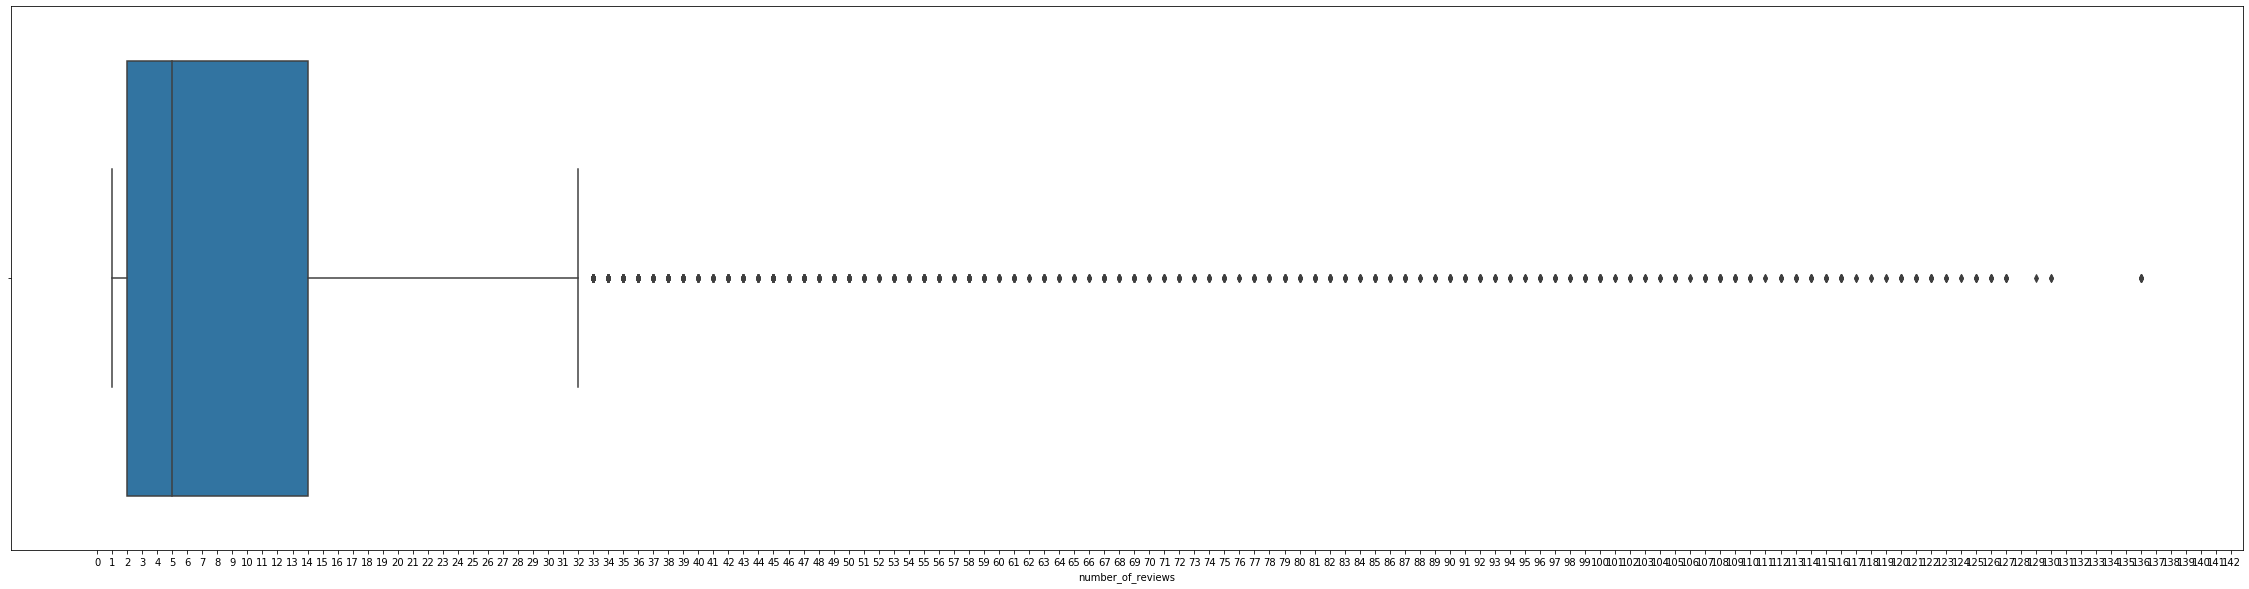

In [0]:
plt.figure(figsize=(40, 10))
plt.xticks(range(0, 150))
sns.boxplot(x='number_of_reviews', data=data)
plt.show()

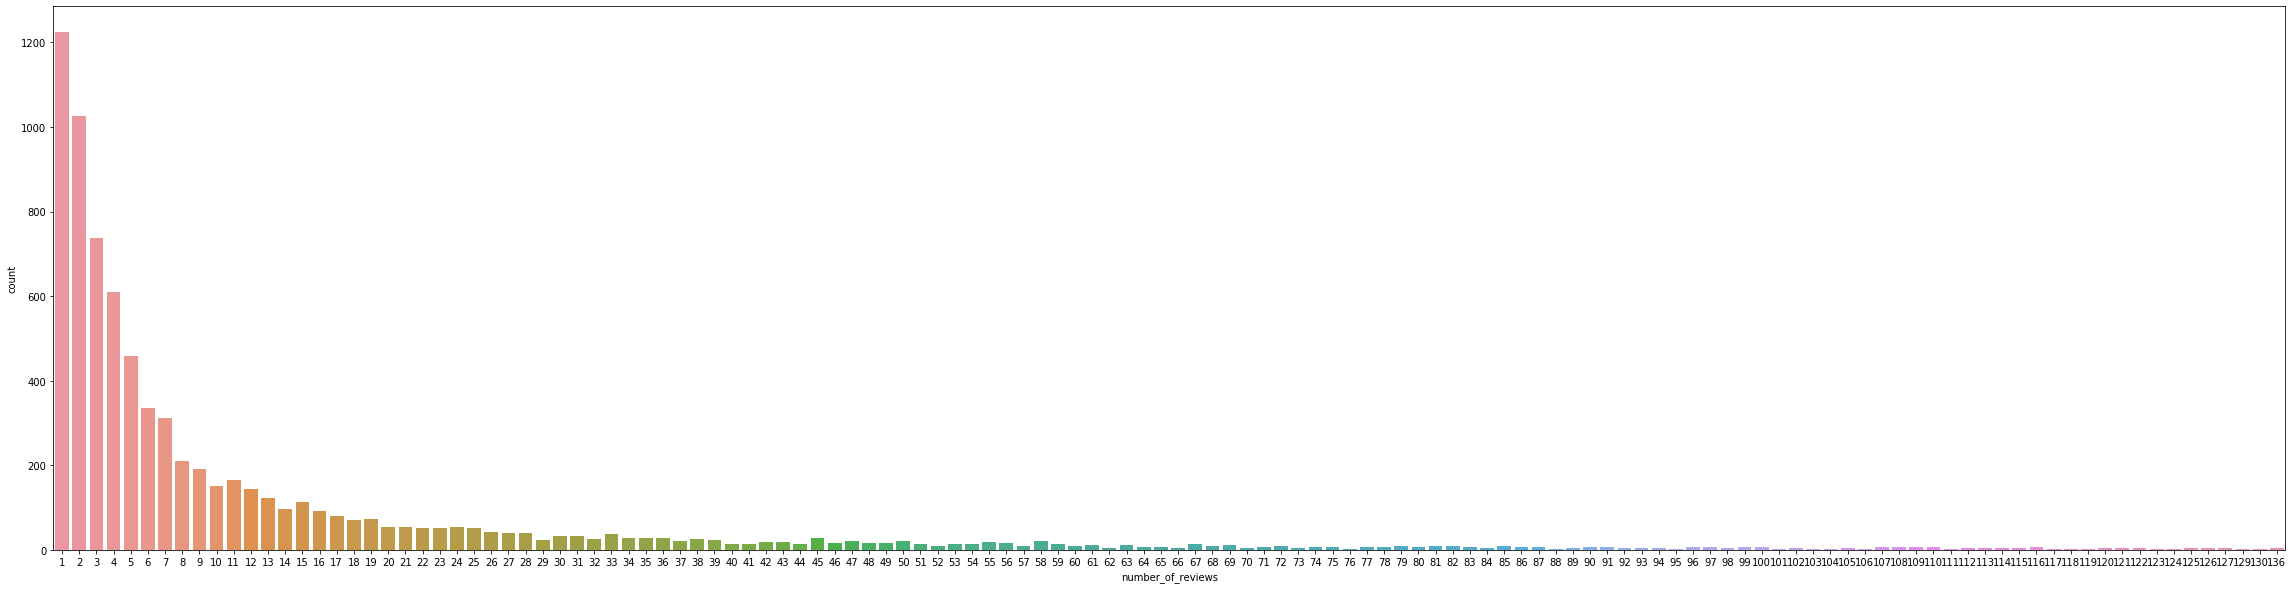

In [0]:
plt.figure(figsize=(40, 10))
plt.xticks(range(0, 150))
sns.countplot(x='number_of_reviews', data=data)
plt.show()

## Looking at the heat map of the user-ratings matrix
- Some new jokes which have been added have no ratings at all
- There seems to be biaseness in popularity of jokes as some are more rated than other
- We can solve the cold start problem by recommending the most popular jokes

[]

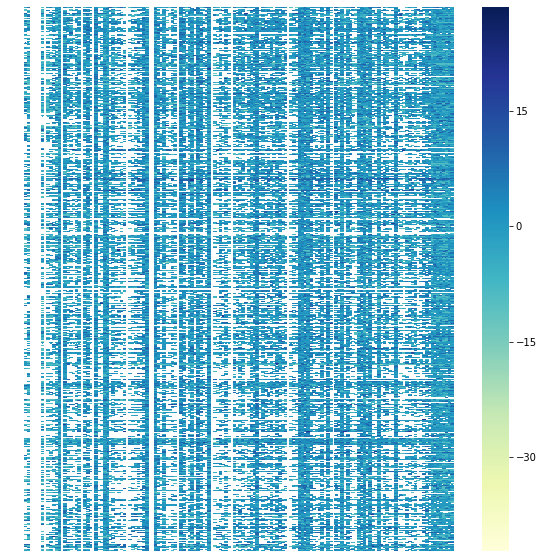

In [0]:
plt.figure(figsize=(10, 10))
sns.heatmap(data[data.columns.difference(['number_of_reviews'])], annot=False, xticklabels=False, yticklabels=False, cmap='YlGnBu')
plt.plot()

In [0]:
data.isna().sum()

number_of_reviews       0
1                    7699
2                    7699
3                    7699
4                    7699
                     ... 
154                  6358
155                  6371
156                  6379
157                  6346
158                  6342
Length: 159, dtype: int64

## Looking at the values of ratings overall
- Most rating are neutral or zero
- There are more positive reviews than negative reviews
- Negative reviews should weight in more while creating user profiles

[]

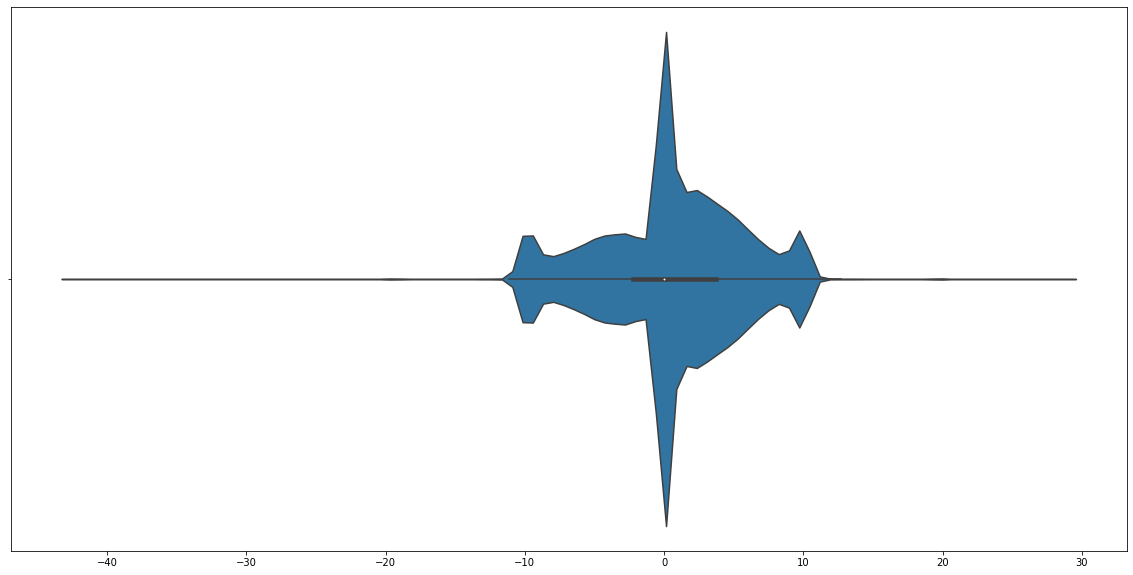

In [0]:
plt.figure(figsize=(20, 10))
sns.violinplot(data[data.columns.difference(['number_of_reviews'])].values.flatten())
plt.plot()

In [0]:
temp = data[data.columns.difference(['number_of_reviews'])].values.flatten()
temp = temp[~np.isnan(temp)]

In [0]:
temp

array([ 3.7 ,  8.21, -5.98, ...,  0.  ,  4.59,  3.86])

In [0]:
greater_than_0 = sum(np.where(temp > 0, 0, 1))
less_than_0 = sum(np.where(temp < 0, 0, 1))
equal_than_0 = sum(np.where(temp == 0, 0, 1))

In [0]:
df = pd.DataFrame(columns=['val', 'key'])
df['val'] = [greater_than_0, less_than_0, equal_than_0]
df['key'] = ['greater_than_zero', 'less_than_zero', 'equal_zero']

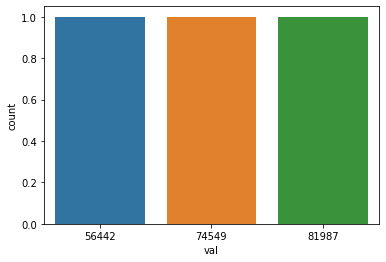

In [0]:
sns.countplot(x='val', data=df)

## Looking at average reviews per person
- Most people are neutral where as people are equally positive or negative in numers

[]

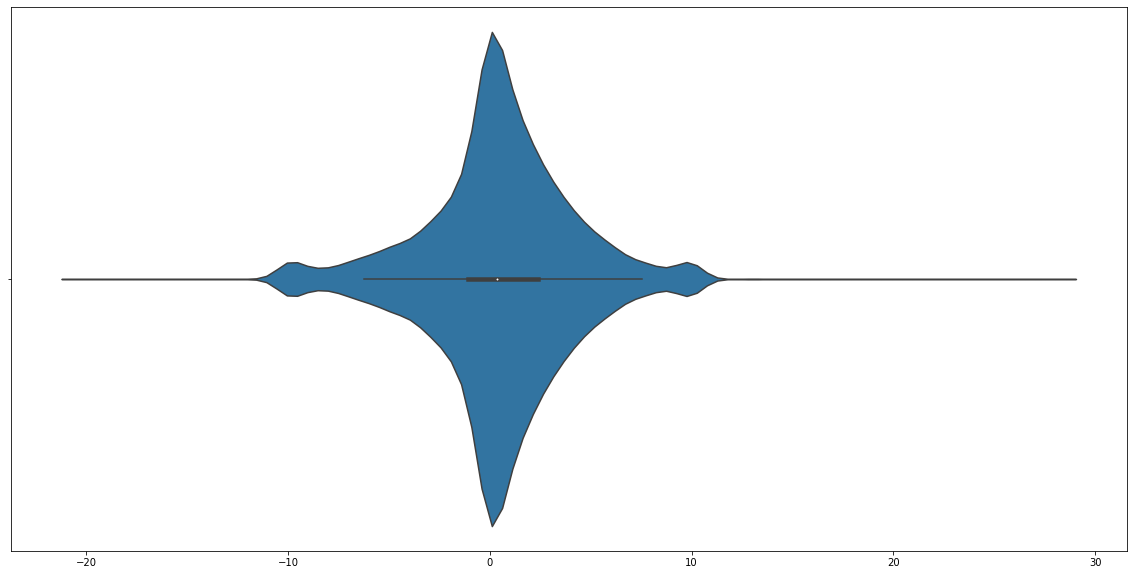

In [0]:
plt.figure(figsize=(20, 10))
sns.violinplot(data[data.columns.difference(['number_of_reviews'])].mean(axis=1))
plt.plot()

## Looking at average reviews per jokes
- Looking at this graph it is clear that we should recommen only the good jokes to the user with cold start problem


[]

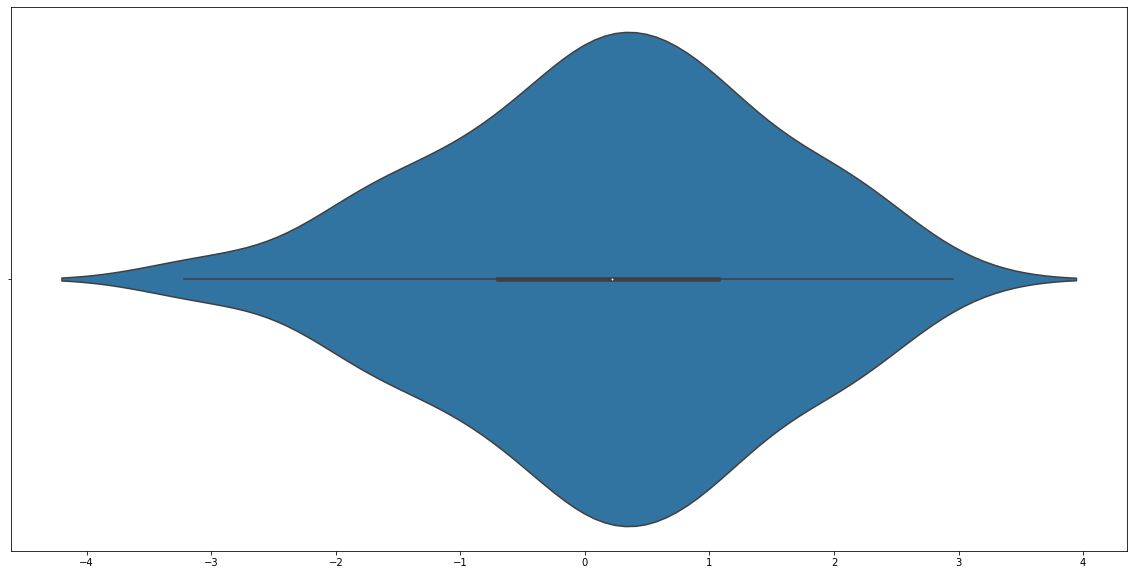

In [0]:
plt.figure(figsize=(20, 10))
sns.violinplot(data[data.columns.difference(['number_of_reviews'])].mean(axis=0))
plt.plot()

In [0]:
data

,number_of_reviews,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.41,NaN,-4.59,NaN,NaN,NaN,NaN,3.98,NaN,NaN,4.07,NaN,NaN,4.15,NaN,NaN,0.00,0.0,NaN,0.0,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,4.67,-5.37,5.28,NaN,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.61,-4.51,0.00,0.0,NaN,0.00,5.93,4.19
4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,9.47,0.0,NaN,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
7695,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7696,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,9.47,NaN,NaN,-7.63,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.41,NaN,NaN,-5.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.63,NaN,6.76,0.00,3.5,6.26,NaN,-2.66,0.65
7697,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.52,NaN,5.37,NaN,NaN,NaN,NaN,0.57,NaN,4.31,1.72,NaN,NaN,1.44,NaN,NaN,-1.65,3.5,NaN,0.0,3.54,...,1.91,NaN,3.17,NaN,NaN,NaN,1.89,-5.43,5.79,4.61,0.63,0.0,NaN,6.02,NaN,NaN,1.06,NaN,NaN,8.05,NaN,NaN,NaN,2.7,NaN,0.0,0.0,NaN,0.0,0.0,2.03,NaN,2.05,2.05,0.73,0.0,2.97,0.57,0.00,0.00


In [0]:
!pip install surprise

     |████████████████████████████████| 6.5MB 74kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678234 sha256=987d91dfc14bd65475774d7211d395a2cf927b59d05b7a08c9e4ae03e99fedc6
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, NormalPredictor
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy

In [0]:
data

,number_of_reviews,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.41,NaN,-4.59,NaN,NaN,NaN,NaN,3.98,NaN,NaN,4.07,NaN,NaN,4.15,NaN,NaN,0.00,0.0,NaN,0.0,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,4.67,-5.37,5.28,NaN,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.61,-4.51,0.00,0.0,NaN,0.00,5.93,4.19
4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,9.47,0.0,NaN,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
7695,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7696,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,9.47,NaN,NaN,-7.63,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.41,NaN,NaN,-5.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.63,NaN,6.76,0.00,3.5,6.26,NaN,-2.66,0.65
7697,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.52,NaN,5.37,NaN,NaN,NaN,NaN,0.57,NaN,4.31,1.72,NaN,NaN,1.44,NaN,NaN,-1.65,3.5,NaN,0.0,3.54,...,1.91,NaN,3.17,NaN,NaN,NaN,1.89,-5.43,5.79,4.61,0.63,0.0,NaN,6.02,NaN,NaN,1.06,NaN,NaN,8.05,NaN,NaN,NaN,2.7,NaN,0.0,0.0,NaN,0.0,0.0,2.03,NaN,2.05,2.05,0.73,0.0,2.97,0.57,0.00,0.00


In [0]:
data = data.drop(columns=['number_of_reviews'])

In [0]:
data['user_id'] = range(len(data))

In [0]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,user_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.41,NaN,-4.59,NaN,NaN,NaN,NaN,3.98,NaN,NaN,4.07,NaN,NaN,4.15,NaN,NaN,0.00,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.67,-5.37,5.28,NaN,NaN,NaN,NaN,4.59,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.61,-4.51,0.0,0.0,NaN,0.0,5.93,4.19,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,4


In [0]:
data = data.melt(id_vars=['user_id'], var_name='item_id', value_name='rating')
data = data.dropna()

In [0]:
data

,user_id,item_id,rating
46200,6,7,-4.45
46233,39,7,-10.00
46282,88,7,-5.76
46286,92,7,9.04
46304,110,7,0.00
...,...,...,...
1216420,7677,158,0.00
1216425,7682,158,2.73
1216433,7690,158,0.41
1216439,7696,158,0.65


In [0]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(-10, 10))
# The columns must correspond to user id, item id and ratings (in that order).
data_sup = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)

In [0]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), CoClustering(), BaselineOnly(), NormalPredictor()]:
    # Perform cross validation
    print(str(algorithm))
    results = cross_validate(algorithm, data_sup, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
res = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [0]:
res

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
BaselineOnly,4.518878,3.441954,0.178751,0.221158
KNNBaseline,4.565360,3.420779,6.375596,35.507163
KNNWithMeans,4.646768,3.440053,5.852335,34.434301
CoClustering,4.658962,3.458540,2.134485,0.285973
KNNWithZScore,4.674217,3.438842,6.285843,35.045989
SVD,4.707369,3.541741,4.217631,0.276989
KNNBasic,4.782050,3.593848,5.941441,32.566287
SVDpp,5.163211,3.805574,33.475588,1.859700
NormalPredictor,6.986841,5.590135,0.118782,0.317063


In [0]:
trainset, testset = train_test_split(data_sup, test_size=0.25)
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Using ALS
Estimating biases using als...
RMSE: 4.5145


4.51451679239141

In [0]:
test_res = pd.DataFrame(predictions)
test_res['err'] = abs(test_res['r_ui'] - test_res['est'])

In [0]:
test_res.sort_values(['err']).head(20)

,uid,iid,r_ui,est,details,err
12874,2594,68,10.00,10.000000,{'was_impossible': False},0.000000
24848,2594,108,10.00,10.000000,{'was_impossible': False},0.000000
7043,2594,97,10.00,10.000000,{'was_impossible': False},0.000000
11241,3383,74,-10.00,-10.000000,{'was_impossible': False},0.000000
15952,2025,117,10.00,10.000000,{'was_impossible': False},0.000000
857,2594,117,10.00,10.000000,{'was_impossible': False},0.000000
10511,5975,59,0.00,-0.000115,{'was_impossible': False},0.000115
15845,5487,103,-0.85,-0.850205,{'was_impossible': False},0.000205
16968,4297,145,0.79,0.790264,{'was_impossible': False},0.000264
1755,1231,72,1.34,1.339400,{'was_impossible': False},0.000600


In [0]:
test_res.sort_values(['err'], ascending=False).head(20)

,uid,iid,r_ui,est,details,err
10949,4840,34,-20.00,2.542009,{'was_impossible': False},22.542009
23610,1820,78,20.00,-2.265985,{'was_impossible': False},22.265985
18407,2361,57,-20.00,1.198428,{'was_impossible': False},21.198428
9663,6291,131,19.39,-1.715018,{'was_impossible': False},21.105018
4415,6015,107,20.55,-0.237900,{'was_impossible': False},20.787900
18349,1157,19,20.00,-0.512287,{'was_impossible': False},20.512287
26487,6165,70,18.10,-2.386299,{'was_impossible': False},20.486299
10793,1703,93,-20.00,0.461108,{'was_impossible': False},20.461108
14428,7215,17,19.53,-0.888732,{'was_impossible': False},20.418732
8111,6646,146,18.25,-1.350403,{'was_impossible': False},19.600403


In [0]:
data

,user_id,item_id,rating
46200,6,7,-4.45
46233,39,7,-10.00
46282,88,7,-5.76
46286,92,7,9.04
46304,110,7,0.00
...,...,...,...
1216420,7677,158,0.00
1216425,7682,158,2.73
1216433,7690,158,0.41
1216439,7696,158,0.65


# Using fast AI collaborative filtering

In [0]:
from fastai.collab import * 

In [0]:
data_coll = CollabDataBunch.from_df(data, user_name='user_id', item_name='item_id', rating_name='rating')

In [0]:
learn = collab_learner(data_coll, n_factors=50, y_range=(-10.0, 10.0))

In [0]:
learn 

CollabLearner(data=TabularDataBunch;

Train: LabelList (85192 items)
x: CollabList
user_id 39; item_id 7; ,user_id 88; item_id 7; ,user_id 92; item_id 7; ,user_id 110; item_id 7; ,user_id 125; item_id 7; 
y: FloatList
-10.0,-5.76,9.04,0.0,-5.47
Path: .;

Valid: LabelList (21297 items)
x: CollabList
user_id 2417; item_id 36; ,user_id 3298; item_id 19; ,user_id 1025; item_id 72; ,user_id 4307; item_id 128; ,user_id 1623; item_id 35; 
y: FloatList
2.48,-2.2,-5.39,-6.71,0.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(7423, 50)
  (i_weight): Embedding(137, 50)
  (u_bias): Embedding(7423, 1)
  (i_bias): Embedding(137, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_group

In [0]:
learn.summary()

EmbeddingDotBias
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [50]                 371,150    True      
______________________________________________________________________
Embedding            [50]                 6,850      True      
______________________________________________________________________
Embedding            [1]                  7,423      True      
______________________________________________________________________
Embedding            [1]                  137        True      
______________________________________________________________________

Total params: 385,560
Total trainable params: 385,560
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss function : FlattenedLoss
Callbacks functions applied 

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


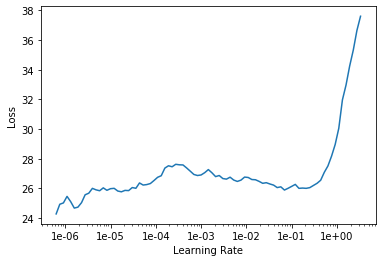

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-02, wd=0.1)

epoch,train_loss,valid_loss,time
0,21.095652,20.973732,00:26
1,19.804628,20.672714,00:26
2,18.682356,21.238443,00:27
3,17.684160,21.146509,00:27
4,15.808083,20.905647,00:27
5,13.733181,20.609367,00:27
6,11.081301,20.516153,00:26
7,8.076083,20.459448,00:26
8,5.662251,20.513992,00:26
9,4.087257,20.539980,00:25


In [0]:
data_coll.show_batch()

user_id,item_id,target
5360,157,4.84
7477,62,-1.99
4918,148,5.54
593,65,0.0
4395,94,0.87


In [0]:
g = data.groupby('item_id')['rating'].count()
top_jokes = g.sort_values(ascending=False).index.values[:1000]
top_jokes = top_jokes.astype(str)
top_jokes[:10]

array(['19', '72', '105', '35', '127', '50', '107', '53', '36', '89'], dtype='<U21')

In [0]:
jokes['item_id'] = range(len(jokes))

In [0]:
jokes = jokes.rename(columns={0: 'title'})

In [0]:

top_jokes_with_name = []
for joke in top_jokes:
    top_jokes_with_name.append(jokes[(jokes['item_id']==int(joke))]['title'])
top_jokes_with_name = np.array(top_jokes_with_name)
top_jokes_with_name

array([19    What's the difference between a MacIntosh and ...
Name: title, dtype: object,
       72    Q: What is the difference between George  Wash...
Name: title, dtype: object,
       105    An engineer dies and reports to the pearly gat...
Name: title, dtype: object,
       35    A guy walks into a bar, orders a beer and says...
Name: title, dtype: object, ...,
       58    The Chukcha (Russian Eskimo) phones up the Rus...
Name: title, dtype: object,
       24    Two kindergarten girls were talking outside: o...
Name: title, dtype: object,
       44    A boy comes home from school and tells his mot...
Name: title, dtype: object,
       141    One day, three men went to a shrine to ask the...
Name: title, dtype: object], dtype=object)

In [0]:
joke_bias = learn.bias(top_jokes, is_item=True)

In [0]:
mean_ratings = data.groupby('item_id')['rating'].mean()
joke_ratings = [(b, top_jokes_with_name[i], mean_ratings.loc[int(tb)]) for i, (tb, b) in enumerate(zip(top_jokes, joke_bias))]

In [0]:
item0 = lambda o:o[0]

## Bias of model versus average rating comparision

In [0]:
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
display(HTML(pd.DataFrame(sorted(joke_ratings, key=item0)[:15]).to_html()))

,0,1,2
0,tensor(-0.5310),"141 One day, three men went to a shrine to ask the Father for forgiveness. The first man went to the Father...First Man: ""Father, Father, I have sinned!"" Father: ""What have you done?"" First Man: ""I have lied!"" Father: ""Drink the holy water and you will be saved."" And so the man drank the water and was ""saved."" The second man went up to the Father... Second Man: ""Father, Father, I have sinned!"" Father: ""What have you done?"" Second Man: ""I have stolen from the jeweler's!"" Father: ""Drink the holy water and you will be saved."" And so the second man drank the holy water and was ""saved."" The third man went up to the Father... Third Man: ""Father, Father, I have sinned!"" Father: ""What have you done?"" Third Man: ""I peed in the holy water!"" Name: title, dtype: object",-3.056369
1,tensor(-0.4220),"124 An American tourist goes into a restaurant in Spain and orders the specialty of the house. When his dinner arrives, he asks the waiter what it is. ""These, senor,"" replied the waiter in broken English, ""are the testicles of the bull killed in the ring today."" The tourist swallowed hard but tasted the dish and thought it was delicious. So he comes back the next evening and orders the same item. When it is served, he says to the waiter, ""These testicles...are much smaller than the ones I had last night."" ""Yes, senor,"" replied the waiter, ""You see...the bull, he does not always lose."" Name: title, dtype: object",-2.618626
2,tensor(-0.3448),"44 A boy comes home from school and tells his mother that he got a part in the school play. ""What part?"" the mother asked. ""I play a Jewish husband,"" the boy replied. ""Go back to school and tell your teacher that you want a speaking role!"" Name: title, dtype: object",-1.843182
3,tensor(-0.3429),"123 Person 1: Hey, wanna hear a great knock-knock joke? Person 2: Sure, What is it? Person 1: Okay, you start. Person 2: Knock-knock. Person 1: Who's there? Person 2: … Person 1: Hah! Name: title, dtype: object",-2.384533
4,tensor(-0.3379),"15 Q. What is orange and sounds like a parrot? A. A carrot. Name: title, dtype: object",-3.216607
5,tensor(-0.3190),"101 A man escaped jail by digging a hole from his jail cell to the outside world. When finally his work was done, he emerged in the middle of a preschool playground. ""I'm free, I'm free!"" he shouted. ""So what?"" said a little girl.""I'm four."" Name: title, dtype: object",-1.936143
6,tensor(-0.2917),"155 A bear walks into a bar and says,""I'd like a beer ……………. and some of those peanuts."" The bartender says, ""Sure, but why the big paws?"" Name: title, dtype: object",-1.474782
7,tensor(-0.2853),"58 The Chukcha (Russian Eskimo) phones up the Russian Parliament Building. A guard answers. Chukcha: ""What is required to become Parliament member?"" Guard: ""What are you, an idiot?"" Chukcha: ""Is it required?"" Name: title, dtype: object",-1.689444
8,tensor(-0.2820),"156 A dog goes into a bar and orders a martini. The bartender says, ""You don't see a dog in here drinking a martini very often."" The dog says, ""At these prices, I'm not surprised."" Name: title, dtype: object",-1.350144
9,tensor(-0.2737),"13 The father was very anxious to marry off his only daughter so he wanted to impress her date. ""Do you like to screw,"" he says. ""Huh"" replied the surprised first date. ""My daughter she loves to screw and she's good at it, you and her should go screw,"" carefully explained the father. Now very interested the boy replied, ""Yes, sir."" Minutes later the girl came down the stairs, kissed her father goodbye and the couple left. After only a few minutes she reappeared, furious, dress torn, hair a mess and screamed ""Dammit, Daddy, it's the TWIST, get it straight!"" Name: title, dtype: object",-3.105056


In [0]:
display(HTML(pd.DataFrame(sorted(joke_ratings, key=item0, reverse=True)[:15]).to_html()))

,0,1,2
0,tensor(0.2825),"117 A man goes into a drug store and asks the pharmacist if he can give him something for the hiccups. The pharmacist promptly reaches out and slaps the man's face. ""What the heck did you do that for?!"" the man screams. ""Well, you don't have the hiccups anymore, do you?"" The man says, ""No I don't, you IDIOT...but my wife out in the car still does!"" Name: title, dtype: object",2.734294
1,tensor(0.2709),"114 A lady bought a new Lexus. It cost a bundle. Two days later, she brought it back, complaining that the radio was not working.""Madam,"" said the sales manager, ""the audio system in this car is completely automatic. All you need to do is tell it what you want to listen to, and you will hear exactly that!"" She drove out, somewhat amazed and a little confused. She looked at the radio and said, ""Nelson."" The radio responded, ""Ricky or Willie?"" She was astounded. If she wanted Beethoven, that's what she got. If she wanted Nat King Cole, she got it. She was stopped at a traffic light enjoying ""On the Road Again"" when the light turned green and she pulled out. Suddenly an enormous sports utility vehicle coming from the street she was crossing sped toward her, obviously not paying attention to the light. She swerved and narrowly missed a collision.""Idiot!"" she yelled and, from the radio, ""Ladies and gentlemen, the President of the United States."" Name: title, dtype: object",2.198366
2,tensor(0.2585),"89 Q: How many programmers does it take to change a lightbulb? A: NONE! That's a hardware problem.... Name: title, dtype: object",2.181611
3,tensor(0.2419),"106 (A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans.(E) Conclusion: Eat and drink what you like. It's speaking English that kills you. Name: title, dtype: object",2.684724
4,tensor(0.2407),"68 This guys wife asks, ""Honey if I died would you remarry?"" and he replies, ""Well, after a considerable period of grieving, we all need companionship, I guess I would."" She then asks, ""If I died and you remarried, would she live in this house?"" and he replies, ""We've spent a lot of time and money getting this house just the way we want it. I'm not going to get rid of my house, I guess she would."" ""If I died and you remarried, and she lived in this house, would she sleep in our bed?"" and he says, ""That bed is brand new, we just paid two thousand dollars for it, it's going to last a long time, I guess she would."" So she asks, ""If I died and you remarried, and she lived in this house, and slept in our bed, would she use my golf clubs?"" ""Oh no, she's left handed."" Name: title, dtype: object",2.304007
5,tensor(0.2386),"126 A little boy goes to his dad and asks, ""What is politics?""His dad says, ""Well son, let me try to explain it this way: I'm the breadwinner of the family, so let's call me capitalism. Your Mom, she's the administrator of the money, so we'll call her the government. We're here to take care of your needs, so we'll call you the people. The nanny, we'll consider her the working class. And your baby brother, we'll call him the future. Now, think about that and see if that makes sense."" So the little boy goes off to bed thinking about what dad had said. Later that night, he hears his baby brother crying, so he gets up to check on him. He finds that the baby has severely soiled his diaper. So the little boy goes to his parents' room and finds his mother sound asleep. Not wanting to wake her, he goes to the nanny's room. Finding the door locked, he peeks in the keyhole and sees his father in bed with the nanny. He gives up and goes back to bed.

## Neural net 

In [0]:
learn = collab_learner(data_coll, use_nn=True, emb_szs={'user_id': 50, 'item_id':50}, layers=[256, 128], y_range=(-10.0, 10.0))

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


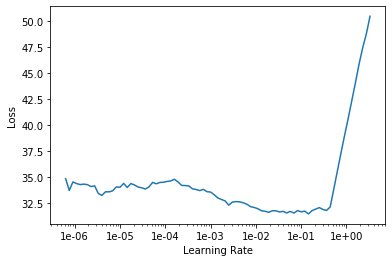

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-02)

epoch,train_loss,valid_loss,time
0,22.078270,21.463411,00:32
1,20.305264,20.812714,00:32
2,19.490509,20.569881,00:34
3,18.820576,20.642391,00:34
4,18.182674,20.435810,00:34
5,16.984522,20.609364,00:34
6,15.897850,20.645609,00:33
7,14.496245,21.065956,00:33
8,13.281274,21.318611,00:33
9,12.907055,21.675922,00:32


In [0]:
len(data['user_id'].unique()), len(data['item_id'].unique())

(7699, 136)

In [0]:
learn

CollabLearner(data=TabularDataBunch;

Train: LabelList (85192 items)
x: CollabList
user_id 39; item_id 7; ,user_id 88; item_id 7; ,user_id 92; item_id 7; ,user_id 110; item_id 7; ,user_id 125; item_id 7; 
y: FloatList
-10.0,-5.76,9.04,0.0,-5.47
Path: .;

Valid: LabelList (21297 items)
x: CollabList
user_id 2417; item_id 36; ,user_id 3298; item_id 19; ,user_id 1025; item_id 72; ,user_id 4307; item_id 128; ,user_id 1623; item_id 35; 
y: FloatList
2.48,-2.2,-5.39,-6.71,0.0
Path: .;

Test: None, model=EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(7423, 50)
    (1): Embedding(137, 50)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=256, out_features=128, bias=Tru

In [0]:
learn.summary()

EmbeddingNN
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [50]                 371,150    False     
______________________________________________________________________
Embedding            [50]                 6,850      False     
______________________________________________________________________
Dropout              [100]                0          False     
______________________________________________________________________
Linear               [256]                25,856     False     
______________________________________________________________________
ReLU                 [256]                0          False     
______________________________________________________________________
BatchNorm1d          [256]                512        False     
______________________________________________________________________
Linear               [128]                32,896     False     
__________________________________________________